In [ ]:
from IPython.display import HTML
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")

In [ ]:
HTML('''
  function code_TOGGLE() {
    if (code_shown){
      $('div.input').hide('500');
      $('#togglebutton').val('Show Code')
    } else{
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = ! code_shown
  }
  $( document ).ready(function()){
    code_shown=false;
    $('div.input').hide()
  });

''')

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats

import statsmodels.api as sm
import json
import time
import pylab
from scipy import stats
from datetime import date
import datetime as dt

import plotly
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected = True)

from IPython.display import display, Math, Latex

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "whitegrid")





In [ ]:
takehome_users = pd.read_csv('/content/drive/MyDrive/Task5/takehome_users.csv', encoding='ISO-8859-1')
takehome_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [ ]:
takehome_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [ ]:
takehome_user_engagement = pd.read_csv("/content/drive/MyDrive/Task5/takehome_user_engagement.csv", encoding = "ISO-8859-1")
takehome_user_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [ ]:
takehome_user_engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


## data cleaning

In [ ]:
# seperating day, week, years functions

def get_date_int(df,column):
  year = df[column].dt.year
  month = df[column].dt.month
  day = df[column].dt.day
  return year, month, day

def get_week(x): return x.isocalendar()

def get_iso_date_int(df, column):

  temp_df = pd.DataFrame(df[column].tolist(), index = df.index)
  year, month, day =temp_df[0], temp_df[1], temp_df[2]
  return year, month, day


In [ ]:
takehome_users = pd.read_csv("/content/drive/MyDrive/Task5/takehome_users.csv", encoding ='ISO-8859-1')
takehome_users.creation_time = pd.to_datetime(takehome_users['creation_time'])
takehome_users.last_session_creation_time = pd.to_datetime(takehome_users['last_session_creation_time'])
# naming users as heding user id and copying ids
takehome_users['user_id'] = takehome_users['object_id']
# drop orginal user id column
takehome_users.drop('object_id',axis = 1, inplace =True )
# drop unwanted personal info
takehome_users.drop(["name","email"],axis = 1, inplace = True)

takehome_users.head()

,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_id
0,2014-04-22 03:53:30,GUEST_INVITE,1970-01-01 00:00:01.398138810,1,0,11,10803.0,1
1,2013-11-15 03:45:04,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0,2
2,2013-03-19 23:14:52,ORG_INVITE,1970-01-01 00:00:01.363734892,0,0,94,1525.0,3
3,2013-05-21 08:09:28,GUEST_INVITE,1970-01-01 00:00:01.369210168,0,0,1,5151.0,4
4,2013-01-17 10:14:20,GUEST_INVITE,1970-01-01 00:00:01.358849660,0,0,193,5240.0,5


In [ ]:
takehome_users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   creation_time               12000 non-null  datetime64[ns]
 1   creation_source             12000 non-null  object        
 2   last_session_creation_time  8823 non-null   datetime64[ns]
 3   opted_in_to_mailing_list    12000 non-null  int64         
 4   enabled_for_marketing_drip  12000 non-null  int64         
 5   org_id                      12000 non-null  int64         
 6   invited_by_user_id          6417 non-null   float64       
 7   user_id                     12000 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(4), object(1)
memory usage: 750.1+ KB


In [ ]:
# covert time stamp to date time foramt

takehome_user_engagement["time_stamp"] = pd.to_datetime(takehome_user_engagement["time_stamp"])

# weekly timestamp to get adopted user

takehome_user_engagement["week_time_stamp"] = takehome_user_engagement['time_stamp'].apply(get_week)

In [ ]:
# first user login
print("First user login time", min(takehome_user_engagement.time_stamp))
# last user login
print("Last user login time", max(takehome_user_engagement.time_stamp))

First user login time 2012-05-31 08:20:06
Last user login time 2014-06-06 14:58:50


In [ ]:
# seperate year, month, day wise

year, month, day = get_date_int(takehome_user_engagement,"time_stamp")
takehome_user_engagement["year"],takehome_user_engagement["month"], takehome_user_engagement["day"] = year, month, day
takehome_user_engagement["week"] = takehome_user_engagement["time_stamp"].dt.week
# convert week to year
iso_year, iso_week, iso_day = get_iso_date_int(takehome_user_engagement,"week_time_stamp")
takehome_user_engagement["year_week"] = list(zip(iso_year,iso_week))


In [ ]:
takehome_user_engagement

,time_stamp,user_id,visited,week_time_stamp,year,month,day,week,year_week
0,2014-04-22 03:53:30,1,1,"(2014, 17, 2)",2014,4,22,17,"(2014, 17)"
1,2013-11-15 03:45:04,2,1,"(2013, 46, 5)",2013,11,15,46,"(2013, 46)"
2,2013-11-29 03:45:04,2,1,"(2013, 48, 5)",2013,11,29,48,"(2013, 48)"
3,2013-12-09 03:45:04,2,1,"(2013, 50, 1)",2013,12,9,50,"(2013, 50)"
4,2013-12-25 03:45:04,2,1,"(2013, 52, 3)",2013,12,25,52,"(2013, 52)"
...,...,...,...,...,...,...,...,...,...
207912,2013-09-06 06:14:15,11996,1,"(2013, 36, 5)",2013,9,6,36,"(2013, 36)"
207913,2013-01-15 18:28:37,11997,1,"(2013, 3, 2)",2013,1,15,3,"(2013, 3)"
207914,2014-04-27 12:45:16,11998,1,"(2014, 17, 7)",2014,4,27,17,"(2014, 17)"
207915,2012-06-02 11:55:59,11999,1,"(2012, 22, 6)",2012,6,2,22,"(2012, 22)"


In [ ]:
takehome_user_engagement = takehome_user_engagement.sort_values(["time_stamp", "user_id"], ascending = True)
takehome_user_engagement = takehome_user_engagement[["user_id","visited", "day","year_week"]]

In [ ]:
takehome_user_engagement

,user_id,visited,day,year_week
178140,10012,1,31,"(2012, 22)"
59486,3428,1,31,"(2012, 22)"
175638,9899,1,31,"(2012, 22)"
26821,1693,1,31,"(2012, 22)"
109716,6102,1,1,"(2012, 22)"
...,...,...,...,...
84316,4625,1,4,"(2014, 23)"
162633,9325,1,4,"(2014, 23)"
168409,9558,1,4,"(2014, 23)"
6053,341,1,4,"(2014, 23)"


In [ ]:
# finding adopted user

adopted_user_dict ={}

weeks = takehome_user_engagement.year_week
user_ids = list(set(takehome_user_engagement["user_id"]))


In [ ]:
# getting ids
for i in range(len(user_ids)):
  user_id = user_ids[i]
  # dataframe for dulicate user
  reduced_df = takehome_user_engagement[(takehome_user_engagement["user_id"]==user_id) & (weeks.isin(weeks[weeks.duplicated()]))]
  # count more than 2 day weeks
  week_counts = reduced_df.year_week.value_counts()[reduced_df.year_week.value_counts()>2]
  three_logins = reduced_df[reduced_df.year_week.isin(list(week_counts.index))]
  # log in 3 day with a wee removed
  three_logins = three_logins[~three_logins.duplicated()]
# 3day loggged
  adopted_user_dict[str(user_id)] = len(three_logins)

In [ ]:
# adding engagement indicator column to dataframe


takehome_user_engagement["engagement_index"] = takehome_user_engagement["user_id"].apply(lambda x: adopted_user_dict[str(x)])
# filtering 3 login in week

takehome_user_engagement["adopted_user"]=0
takehome_user_engagement["adopted_user"][takehome_user_engagement["engagement_index"]>0] = 1


In [ ]:
adopted_count = takehome_user_engagement[["user_id","adopted_user"]][takehome_user_engagement["adopted_user"] == 1].groupby("user_id").count()
print("No.of Adopted users: ",len(adopted_count))

No.of Adopted users:  1445


In [ ]:
# merging adopted user to user details
adopted = takehome_user_engagement[["user_id","adopted_user"]]
adopted_users = pd.merge(takehome_users,adopted, on= "user_id", how = "outer")


In [ ]:
creation_year, creation_month, creation_day = get_date_int(adopted_users,"creation_time")
last_session_year, last_session_month, last_session_day = get_date_int(adopted_users, "last_session_creation_time")
adopted_users["creation_year"], adopted["creation_month"], adopted["creation_day"] = creation_year, creation_month, creation_day
adopted_users["last_session_year"], adopted_users["last_session_month"], adopted_users["last_session_day"] = last_session_year, last_session_month, last_session_day
adopted_users.drop(["creation_time","last_session_creation_time", "user_id"], axis = 1, inplace = True)

In [ ]:
# MODEL PREP
# fill na values  zeros

adopted_users.last_session_day.fillna(0,inplace = True)
adopted_users.last_session_month.fillna(0, inplace = True)
adopted_users.last_session_year.fillna(0, inplace = True)

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
le = preprocessing.LabelEncoder()
adopted_users["creation_source"] = le.fit_transform(adopted_users["creation_source"])


In [ ]:
adopted_users

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,creation_year,last_session_year,last_session_month,last_session_day
0,0,1,0,11,10803.0,0.0,2014,1970.0,1.0,1.0
1,1,0,0,1,316.0,1.0,2013,1970.0,1.0,1.0
2,1,0,0,1,316.0,1.0,2013,1970.0,1.0,1.0
3,1,0,0,1,316.0,1.0,2013,1970.0,1.0,1.0
4,1,0,0,1,316.0,1.0,2013,1970.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
211089,1,0,0,89,8263.0,0.0,2013,1970.0,1.0,1.0
211090,4,0,0,200,NaN,0.0,2013,1970.0,1.0,1.0
211091,0,1,1,83,8074.0,0.0,2014,1970.0,1.0,1.0
211092,2,0,0,6,NaN,0.0,2012,1970.0,1.0,1.0


In [ ]:
# binary for invited yes or no filling
# adopted_users["invited"] = np.where(adopted_users["invited_by_user_id"].isnull(), 1, 0)
# adopted_users.drop("invited_by_user_id",axis = 1, inplace = True)
# filling miss values
adopted_users = adopted_users.fillna(0)
# crate column for out puts
col_names = list(pd.Series(adopted_users.columns)[pd.Series(adopted_users.columns) != "adopted_user"])
# convert as array
x = adopted_users[list(pd.Series(adopted_users.columns)[pd.Series(adopted_users.columns) != "adopted_user"])].values
y = adopted_users["adopted_user"].values


In [ ]:
# training spliting
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, x_test = train_test_split(x, y, test_size = 0.3, random_state = 3)
print("Train size:", (len(x_train)/len(x))*100)
print("Train observations:", (len(x_train)))
print("Test size:", (len(x_test)/len(x))*100)
print("Test observations:",( len(x_test)))

Train size: 69.99962102191441
Train observations: 147765
Test size: 30.00037897808559
Test observations: 63329


In [ ]:
# fitting model into FOREST MODEL

Accuracy 0.9878320305891111 

Feature ranking:


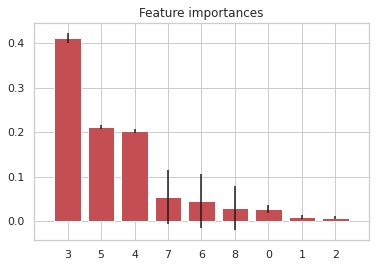

,feature,importance
3,org_id,0.411293
5,creation_year,0.211974
4,invited_by_user_id,0.202912
7,last_session_month,0.053243
6,last_session_year,0.046257
8,last_session_day,0.028478
0,creation_source,0.028123
1,opted_in_to_mailing_list,0.009604
2,enabled_for_marketing_drip,0.008116


In [ ]:
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, roc_auc_score, make_scorer
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 20, random_state = 0, criterion = "gini", class_weight = "balanced")

clf.fit(x_train, y_train.ravel())
Accuracy = clf.score(x_train, y_train.ravel())
print("Accuracy", Accuracy, "\n")

importFeature = clf.feature_importances_
feature_importances = pd.DataFrame([importFeature])

std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis = 0)
indices = np.argsort(importFeature)[::-1]

# print the feature ranking

print("Feature ranking:")

# plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x.shape[1]), importFeature[indices], color ="r", yerr = std[indices], align = "center")
plt.xticks(range(x.shape[1]), indices)
plt.xlim([-1, x.shape[1]])
plt.show()

feature_importances = pd.DataFrame(pd.Series(col_names)[indices])
feature_importances["importance"] = np.sort(importFeature)[::-1]
feature_importances.columns = ["feature","importance"]
feature_importances
